# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.duplicated().sum()

0

### Вывод

1. `first_day_exposition` - object - должен быть тип datetime
2. `ceiling_height` - нулевые значения
3. `floors_total` - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
4. `is_apartment` - должен быть тип bool + нулевые значения
5. `living_area` - нулевые значения
6. `kitchen_area` - нулевые значения
7. `balcony` - нулевые значения
8. `locality_name` - нулевые значения
9. `airports_nearest` - нулевые значения
10. `cityCenters_nearest` - нулевые значения
11. `parks_around3000` - тип должен быть int + нулевые значения
12. `parks_nearest` - нулевые значения
13. `ponds_around3000` - тип должен быть int + нулевые значения
14. `ponds_nearest` - нулевые значения
15. `days_exposition` - тип должен быть int + нулевые значения

## Предобработка данных

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Изменим тип данных столбца `last_price` на `int`

In [7]:
data['last_price'] = data['last_price'].astype('int')

Изменим тип данных столбца `first_day_eposition` на `datetime`

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

В `is_apartment` пропущены значения. Столбец мог появиться не сразу, так как сами апартаменты появились недавно. Заменим все пропущенные значения на `False`

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропущенные значения в столбце `balcony` могут говорить об отсутствии балконов. Заменим пропущенные значения на `0` и изменим тип данных на `int`

In [10]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [11]:
print('Количество пропущенных значений в \'parks_around3000\': {}\n'
      'Количество нулевых значений в \'parks_around3000\': {}\n'
      'Суммарно: {}\n'
       .format(data['parks_around3000'].isna().sum(), 
               (data['parks_around3000'] == 0).sum(), 
               data['parks_around3000'].isna().sum() + (data['parks_around3000'] == 0).sum()))

print('Количество пропущенных значений в \'parks_nearest\': {}\n'
      'Количество значений больше 3000 в \'parks_nearest\': {}\n'
      .format(data['parks_nearest'].isna().sum(), 
              (data['parks_nearest'] > 3000).sum()))

print('Количество строк, где \'parks_around3000\' равно 0 или NaN, а \'parks_nearest\' равно NaN: {}\n'
      'Количество строк, где \'parks_around3000\' равно 0 или NaN, а \'parks_nearest\' больше 3000: {}'
      .format((((data['parks_around3000'].isna()) | (data['parks_around3000'] == 0)) & (data['parks_nearest'].isna())).sum(), 
              (((data['parks_around3000'].isna()) | (data['parks_around3000'] == 0)) & (data['parks_nearest'] > 3000)).sum()))

Количество пропущенных значений в 'parks_around3000': 5518
Количество нулевых значений в 'parks_around3000': 10106
Суммарно: 15624

Количество пропущенных значений в 'parks_nearest': 15620
Количество значений больше 3000 в 'parks_nearest': 4

Количество строк, где 'parks_around3000' равно 0 или NaN, а 'parks_nearest' равно NaN: 15620
Количество строк, где 'parks_around3000' равно 0 или NaN, а 'parks_nearest' больше 3000: 4


In [12]:
print('Количество пропущенных значений в \'ponds_around3000\': {}\n'
      'Количество нулевых значений в \'ponds_around3000\': {}\n'
      'Суммарно: {}\n'
       .format(data['ponds_around3000'].isna().sum(), 
               (data['ponds_around3000'] == 0).sum(), 
               data['ponds_around3000'].isna().sum() + (data['ponds_around3000'] == 0).sum()))

print('Количество пропущенных значений в \'ponds_nearest\': {}\n'
      .format(data['ponds_nearest'].isna().sum()))

print('Количество строк, где \'ponds_around3000\' равно 0 или NaN, а \'ponds_nearest\' равно NaN: {}'
      .format((((data['ponds_around3000'].isna()) | (data['ponds_around3000'] == 0)) & (data['ponds_nearest'].isna())).sum()))

Количество пропущенных значений в 'ponds_around3000': 5518
Количество нулевых значений в 'ponds_around3000': 9071
Суммарно: 14589

Количество пропущенных значений в 'ponds_nearest': 14589

Количество строк, где 'ponds_around3000' равно 0 или NaN, а 'ponds_nearest' равно NaN: 14589


Пропущенные значения в столбце `ponds_around3000` говорят об отсутствии водоёмов поблизости. Заменим пропущенные значение на `0`

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Пропущенные значения в столбце `parks_around3000` говорят об отсутствии парков поблизости. Заменим пропущенные значение на `0`

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Пропущенные значения в столбце `days_exposition` могут говорить о продаже в тот же день.Заменим пропущенные значения на `0` и изменим тип данных на `int`

In [15]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

В следующих столбцах не стоит ничего менять:
1. `total_images` - данные в порядке
2. `total_area` - данные в порядке
3. `rooms` - данные в порядке
4. `ceiling_height` -
5. `floors_total` - непонятно, от чего могли появиться пропущенные значения
6. `living_area` - непонятно, от чего могли появиться пропущенные значения
7. `floor` - данные в порядке
8. `studio` - данные в порядке
9. `open_plan` - данные в порядке
10. `kitchen_area` - непонятно, от чего могли появиться пропущенные значения
11. `locality_name` - возможно, населённый пункт был переименован или объединён с другим; такого населённого пункта могла не быть в базе недвижимости
12. `airport_nearest` - непонятно, от чего могли появиться пропущенные значения
13. `cityCenter_nearest` - непонятно, от чего могли появиться пропущенные значения
14. `parks_nearest` - пропущенные значения связаны с отсутствием в пределах 3000 м парка
15. `ponds_nearest` - пропущенные значения связаны с отсутствием в пределах 3000 м водоёмов

## Расчёты и добавление результатов в таблицу

Создадим столбец цены за квадратный метр

In [16]:
data['m_price'] = (data['last_price'] / data['total_area']).round(2)

Создадим столбцы дня недели, месяца и года публикации объявления

In [17]:
data['weakday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Создадим столбец с типом этажа квартиры (первый, последний, другой)

In [18]:
data['floor_type'] = data.apply(lambda x: 'Первый' if x['floor']==1 else ('Последний' if x['floor']==x['floors_total'] else 'Другой'), axis=1)

Создадим столбцы с соотношением жилой площади к общей и с соотношением площади кухни к общей площади

In [19]:
data['living_part'] = (data['total_area'] / data['living_area']).round(2)
data['kitchen_part'] = (data['total_area'] / data['kitchen_area']).round(2)

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,weakday,month,year,floor_type,living_part,kitchen_part
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,120370.37,3,3,2019,Другой,2.12,4.32
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,82920.79,1,12,2018,Первый,2.17,3.67
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,92785.71,3,8,2015,Другой,1.63,6.75
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,408176.10,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,100000.00,1,6,2018,Другой,3.12,2.44


## Исследовательский анализ данных

### Изучение площади, цены, числа комнат, высоты потолков. Построение гистограмм для каждого параметра

**Изучим общую прощадь**

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

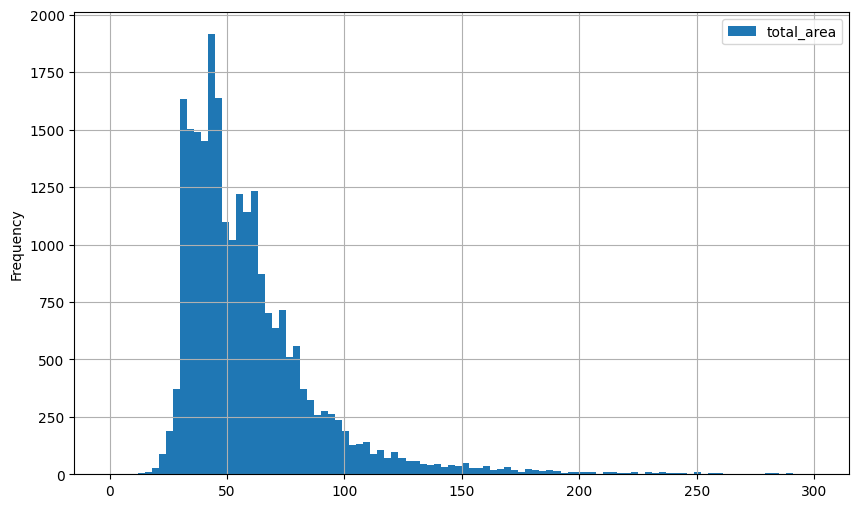

In [21]:
data.plot(y='total_area', kind='hist', grid=True, bins=100, range=(0, 300), figsize=(10,6))
data['total_area'].describe()

Данные в порядке. Есть выбросы, но их достаточно мало (квартиры с прощадью больше 300 $м^2$ всего 61 из 23 тыс). Самые популярные квартиры с площадью 30-60 $м^2$, что соответствует однушкам и двушкам

**Изучим цену**

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

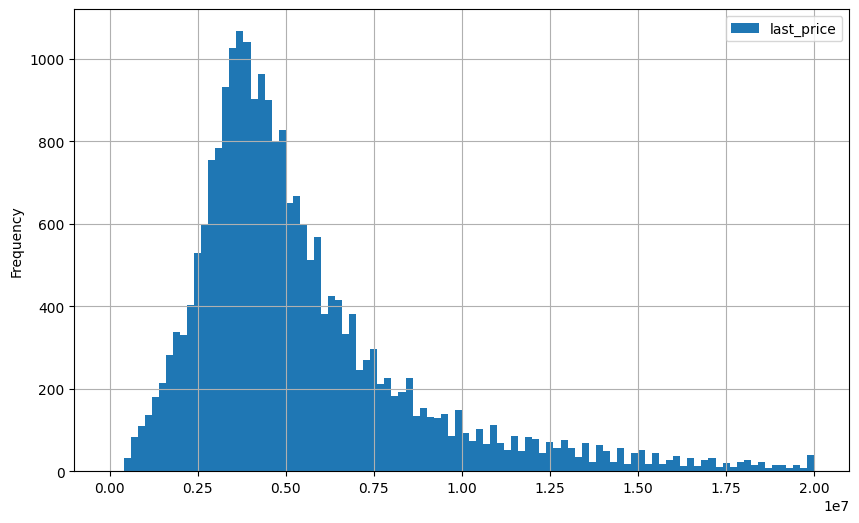

In [22]:
data.plot(y='last_price', kind='hist', grid=True, bins=100, figsize=(10, 6), range=(0, 10**7*2))
data['last_price'].describe()

На гистограмме видно, что большинство квартир продаются в пределах 2.5-6 млн. рублей. Квартиры после 20 млн. рублей не так популярны, всего их 707 из 23 тыс.

**Изучим число комнат**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

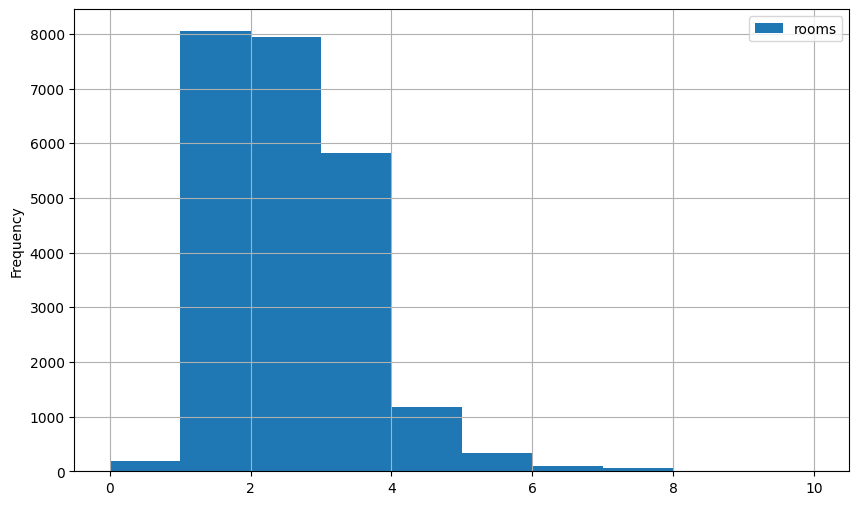

In [23]:
data.plot(y='rooms', kind='hist', grid=True, bins=10, figsize=(10,6), range=(0, 10))
data['rooms'].describe()

Как было предположено на графике площади, самые популярные квартиры с 1-2 комнатами, хотя и 3-х комнатные не отстают. Квартиры с 10 и большим количеством комнат всего 11

**Изучим высоту потолков**

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

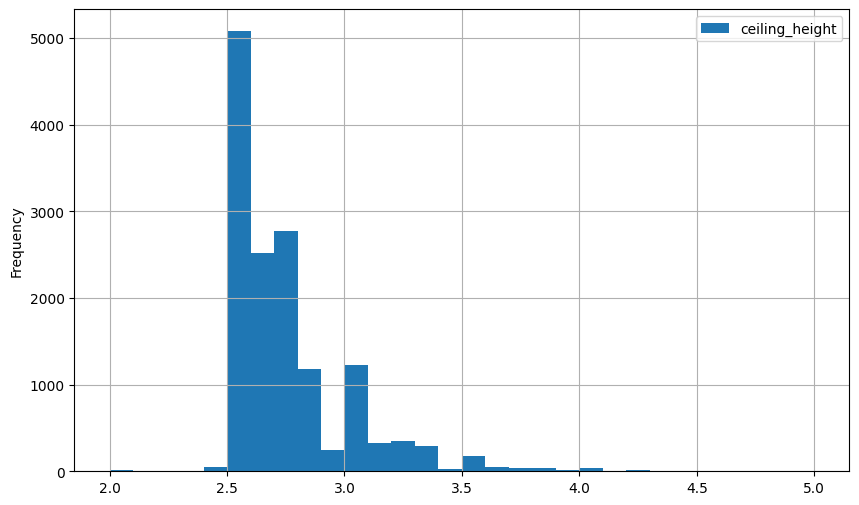

In [24]:
data.plot(y='ceiling_height', kind='hist', bins = 30, grid=True, figsize=(10, 6), range=(2,5))
data['ceiling_height'].describe()

Распределение выглядит привдопободно. Квартир с высотой потолков выше 5 м всего 36 (есть уникальные выбросы с высотой 100), квартир с высотой потолков менее 2 м всего 3

### 4.2 Изучение времени продажи квартиры. Построение гистограммы. Подсчёт среднего и медианного. Описание "быстрых" и "медленных" продаж

Срок продажи 0 дней не обязательно говорит о том, что квартриру продали в тот же день. Поэтому будет изучать данные со значениями больше 0.

**Изучение времени продажи квартиры**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

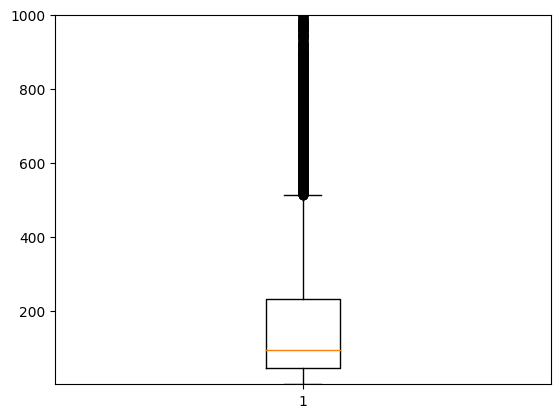

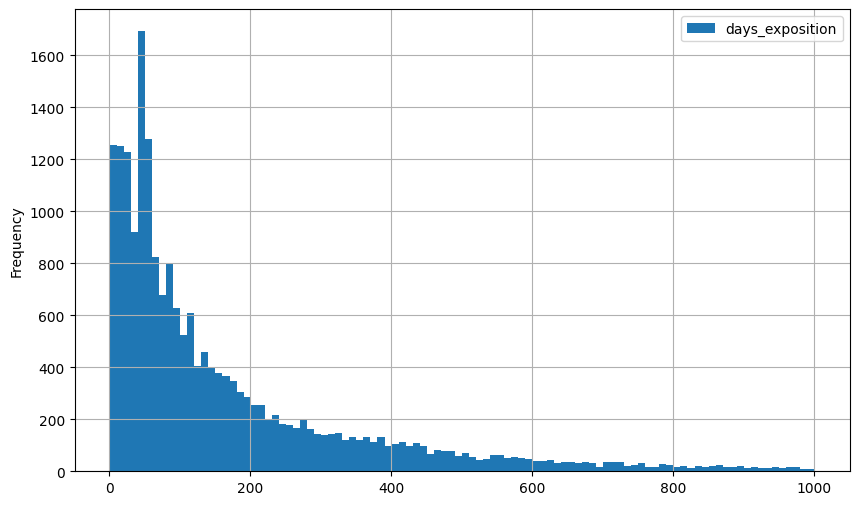

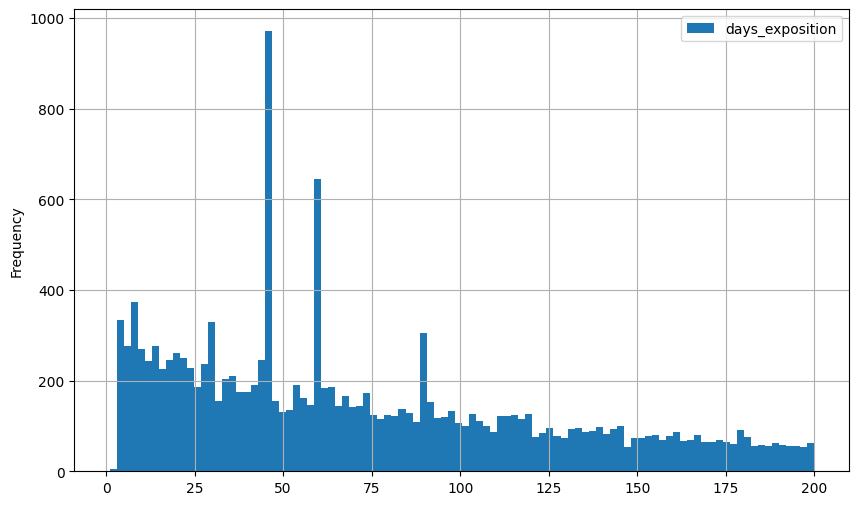

In [25]:
plt.boxplot(data[data['days_exposition'] != 0]['days_exposition'])
plt.ylim(1, 1000)

data.plot(y='days_exposition', kind='hist', grid=True, bins=100, figsize=(10,6), range=(1, 1000))
data.plot(y='days_exposition', kind='hist', grid=True, bins=100, figsize=(10,6), range=(1, 200))

data[data['days_exposition'] != 0]['days_exposition'].describe()

Большинство квартрир продалось в течении 3 месяцев, а среднее время продажи составляет 6 месяцев. Есть и уникальные, которые продавались более 1000 дней, таких 276. Из-за подобных выбросов медианное и среднее отличается практически в 2 раза.

В [поддержке Яндекс.Недвижимости](https://yandex.ru/support/realty/owner/home/add-ads-housing.html) можно ознакомиться о сроке поблукации объявлений.
На диаграмме видны всплески как раз на 7, 30, 45, 60 и 90 днях. Методом `value_counts()` в этом можно убедиться. Однако, в поддержке так же указано, что данные правила не распространяются на Санкт-Петербург и область. Возможно, это правило было создано не сразу после начала сбора данных.

Слишком долгую продажу можно считать, если квартира продавалась в дольше 512 дней. Нормальной продажей можно считать продажу в течении 232 дней. Быстрой же можно считать продажу в течении 45 дней.

In [26]:
data[(data['days_exposition'] == 7) | 
     (data['days_exposition'] == 30) | 
     (data['days_exposition'] == 45) | 
     (data['days_exposition'] == 60) | 
     (data['days_exposition'] == 90)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,weakday,month,year,floor_type,living_part,kitchen_part
11,9,3300000,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,...,0.0,NaN,7,75000.00,0,8,2018,Другой,1.42,7.33
12,10,3890000,54.0,2016-06-30,2,NaN,5.0,30.0,5,False,...,0.0,NaN,90,72037.04,3,6,2016,Последний,1.80,6.00
22,20,5000000,58.0,2017-04-24,2,2.75,25.0,30.0,15,False,...,0.0,NaN,60,86206.90,0,4,2017,Другой,1.93,5.27
78,9,4350000,37.0,2018-02-22,1,NaN,19.0,18.0,6,False,...,0.0,NaN,45,117567.57,3,2,2018,Другой,2.06,3.46
82,3,4500000,80.5,2018-01-15,3,NaN,25.0,NaN,16,False,...,0.0,NaN,60,55900.62,0,1,2018,Другой,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,9,5100000,36.0,2018-10-26,1,2.80,15.0,18.0,11,False,...,1.0,405.0,60,141666.67,4,10,2018,Другой,2.00,4.50
23642,14,5950000,80.3,2018-07-03,3,2.70,12.0,NaN,5,False,...,2.0,562.0,60,74097.14,1,7,2018,Другой,NaN,NaN
23670,9,2450000,45.6,2018-02-08,1,2.80,9.0,NaN,2,False,...,0.0,NaN,45,53728.07,3,2,2018,Другой,NaN,NaN
23679,0,2500000,35.0,2017-12-08,1,NaN,9.0,NaN,4,False,...,0.0,NaN,45,71428.57,4,12,2017,Другой,NaN,NaN


Не все квартиры, что были в публикации 90 дней соответствуют требования таблицы с [поддержки Яндекс.Недвижимости](https://yandex.ru/support/realty/owner/home/add-ads-housing.html). Некоторые квартиры были дешевле 10 млн, но продавались 90 дней.

Всего 2064 квартиры были проданы за 7, 30, 45, 60 или 90 дней. Это почти 9% данных. Данные между собой ничем не связаны, кроме срока продажи, поэтому будем считать их аномалией и удалять в дальнейшем. Но важно подметить, что мы не можем утверждать, что все 2064 строк являются аномальными.

### Убираем редкие и выбивающиеся значения

Создадим новую таблицу с отфильтрованными данными

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

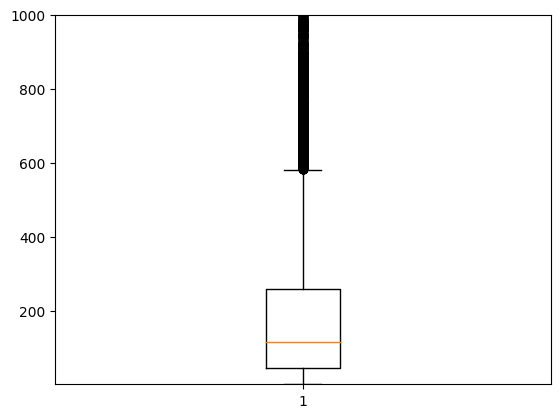

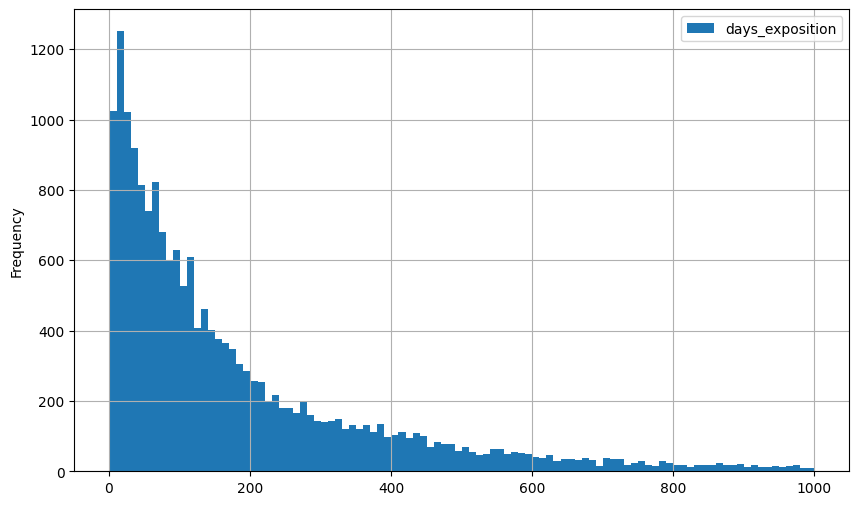

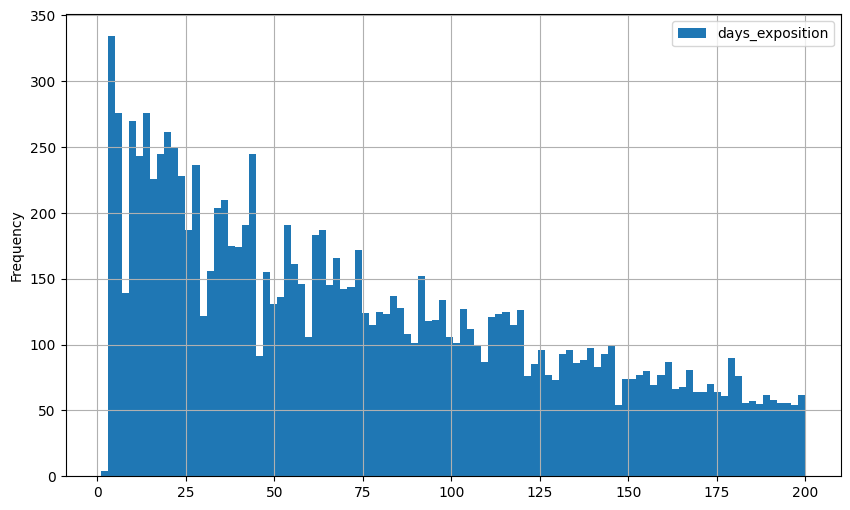

In [27]:
good_data = data[(data['days_exposition'] != 7) & 
                 (data['days_exposition'] != 30) & 
                 (data['days_exposition'] != 45) & 
                 (data['days_exposition'] != 60) & 
                 (data['days_exposition'] != 90) & 
                 (data['days_exposition'] != 0)].copy().reset_index(drop=True)

plt.boxplot(good_data['days_exposition'])
plt.ylim(1, 1000)

good_data.plot(y='days_exposition', kind='hist', grid=True, bins=100, figsize=(10,6), range=(1, 1000))
good_data.plot(y='days_exposition', kind='hist', grid=True, bins=100, figsize=(10,6), range=(1, 200))

good_data['days_exposition'].describe()

Медианное и среднее значения увеличились, что логично, поскольку мы удалили строки со значениями меньше медианного и среднего. Теперь нормальной можно считать продажу в течении 259 дней, долгую - более 581 дня, быструю - в течении 44 дней. 

### Изучение зависимости цены от площади, числа комнат и удалённости от центра. Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучение зависимости цены от даты размещения: дня недели, месяца и года.

**Изучение зависимости цены от площади, числа комнат и удалённости от центра**

In [28]:
good_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.643337,0.354463,-0.191292
total_area,0.643337,1.000000,0.760935,-0.226479
rooms,0.354463,0.760935,1.000000,-0.185123
cityCenters_nearest,-0.191292,-0.226479,-0.185123,1.000000


По матрице корреляции видно, что зависимость цены от общей площади квартиры почти в 2 раза больше, чем зависимость цены от количества комнат в квартире, и в 3 раза больше, чем зависимость цены квартиры от удалённости от центра города. Можно сделать вывод, что с увеличением площади, значительно растёт цена квартиры. Влияение количества комнат на итоговую цену не такое большое, а вот удалённость от центра города незначительно влияет на итоговую стоимость квартиры.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

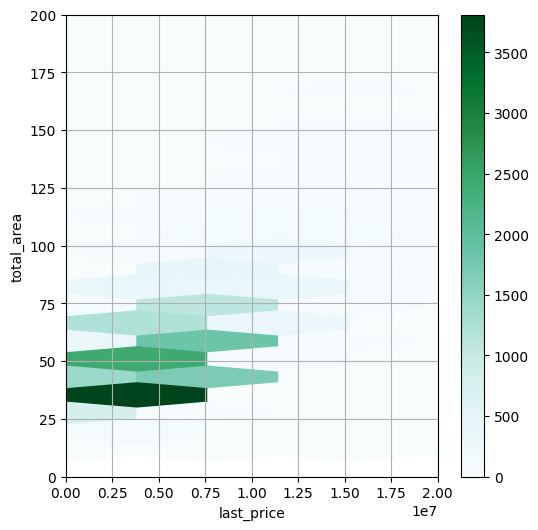

In [29]:
good_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=100, figsize=(6,6), sharex=False, grid=True, xlim=(0, 20000000), ylim=(0, 200))

На графике видно, что большиснтво квартир на продаже имеют площадь 30-60 кв.м. и торгуются до 12.5 млн. рублей. 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

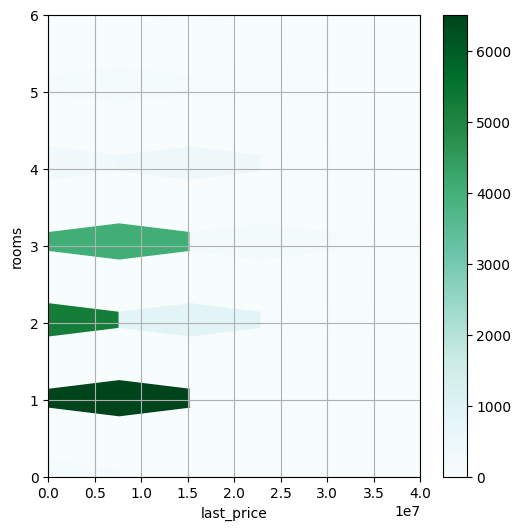

In [30]:
good_data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=50, figsize=(6,6), sharex=False, grid=True, xlim=(0, 40000000), ylim=(0, 6))

На графике видно, что в основном продаются однокомнатные квартиры до 15 млн рублей. 

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

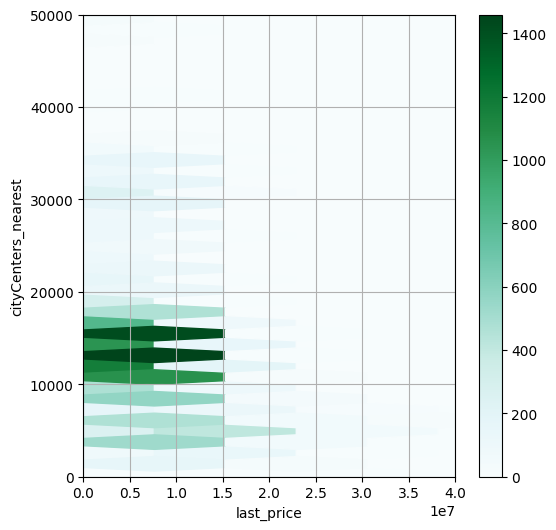

In [31]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=50, figsize=(6,6), sharex=False, grid=True, xlim=(0, 40000000), ylim=(0, 50000))

На графике видно, что основная часть продаваемых квартир находиться в пределах 13-17 тыс. км. от центра. Продаются такие квартиры до 15 млн. рублей.

**Изучение зависимости цены от этажа: первого, последнего или другого**

Корелляция работает только с числовыми значениеми. Поэтому создадим столбец `floor_type_int`, где *"Первый"* равен 0, *"Последний"* равен 1, а *"Другой"* принимает пустое значение.

In [32]:
good_data['floor_type_int'] = good_data['floor_type'].apply(lambda x: 0 if x=='Первый' else (1 if x=='Последний' else np.nan))

In [33]:
good_data[['last_price', 'floor_type_int']].corr()

,last_price,floor_type_int
last_price,1.000000,0.081862
floor_type_int,0.081862,1.000000


Тип этажа практически не влияет на итоговую ствоимость квартиры. Сравним с зависимостью стоимости квартиры и её этажа.

In [34]:
good_data[['last_price', 'floor']].corr()

,last_price,floor
last_price,1.000000,0.026236
floor,0.026236,1.000000


Тут связь ещё менее значенительная, чем была до этого. Можно предположить, что этаж квартиры не влияет на её итоговую стоимость.

**Изучение зависимости цены от даты размещения: дня недели, месяца и года**

*Зависимость цены от дня недели публикации объявления*

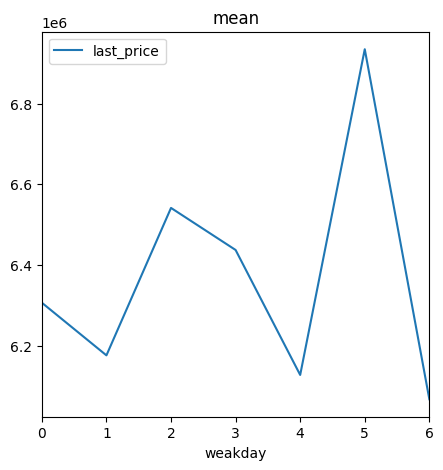

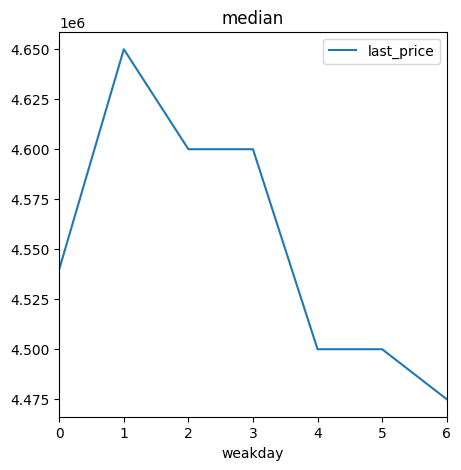

In [35]:
for type in ['mean', 'median']:
    good_data.pivot_table(index='weakday', values='last_price', aggfunc=type).plot(xlim=(0,6), title=type, figsize=(5, 5))

По графикам можно предположить, что по вторникам чаще выставляют дорогие квартиры. А вот по субботам чаще выставляют сильно дорогие квартиры, которые делают среднее значение слишком высоким. В воскресенье в основном выставляют дешёвые квартиры.

*Зависимость цены от месяца публикации объявления*

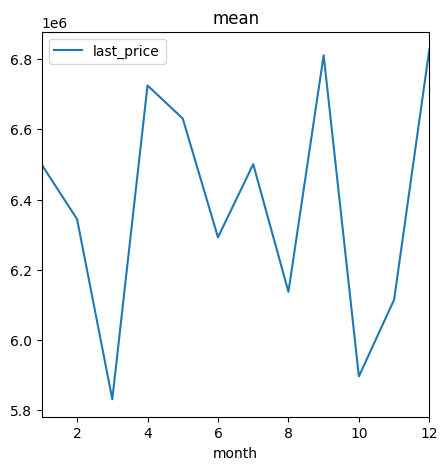

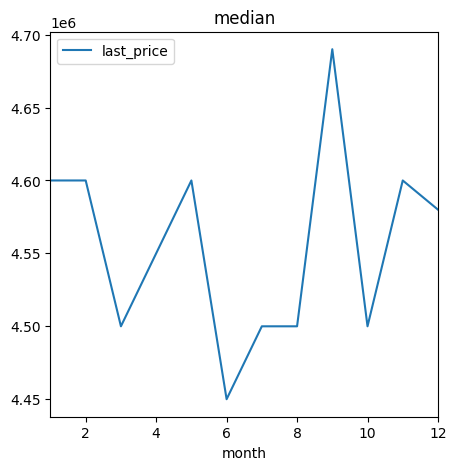

In [36]:
for type in ['mean', 'median']:
    good_data.pivot_table(index='month', values='last_price', aggfunc=type).plot(xlim=(1, 12), title=type, figsize=(5, 5))

На графикам можно увидеть продажу дорогих квартир в мае и в сентябре. А вот квартиры подешевле чаше продают в марте, июне и октябре. 

*Зависимость цены от года публикации объявления*

,last_price,year
last_price,1.000000,-0.059028
year,-0.059028,1.000000


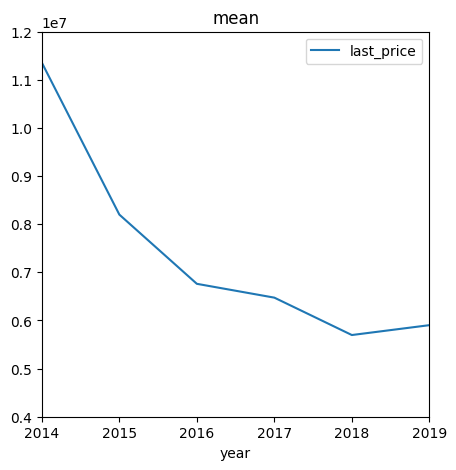

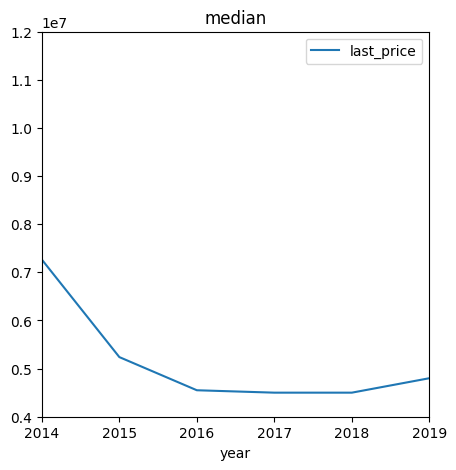

In [37]:
for type in ['mean', 'median']:
    good_data.pivot_table(index='year', values='last_price', aggfunc=type).plot(xlim=(2014, 2019), ylim=(4000000, 12000000), title=type, figsize=(5, 5))
good_data[['last_price', 'year']].corr()

Зависимость цены от года публикации объявления практически минимальна. Но с помощью графиков можно обратить внимание, что с 2014 по 2018 цены на жильё уменьшались, а вот после 2018 цены начали расти. В таком выводе мы не учитываем типы жилья.

### Выберем 10 населённых пунктов с наибольшм числом объявленгий. Посчитаем среднюю цену квадратного метра в этих населённых пунктах

Получим названия населённых пунктов с наибольшим количеством объявлений

In [38]:
top10_count = good_data['locality_name'].value_counts().head(10).index

Посчитаем среднюю цену квадратного метра в этих населённых пунктах

In [39]:
(good_data.query('locality_name in @top10_count')
          .pivot_table(index='locality_name', values='m_price')
          .round(2)
          .sort_values('m_price', ascending=False))

,m_price
locality_name,
Санкт-Петербург,112342.03
Пушкин,102690.65
деревня Кудрово,92234.34
посёлок Парголово,89777.77
посёлок Мурино,85660.94
посёлок Шушары,78209.19
Колпино,75145.10
Всеволожск,68612.11
Гатчина,67323.27


Таким образом, среди самых популярных населённых пунктов квадратный метр дороже всего в *Санкт-Петербурге*, *Пушкино* и *Кудрово*, а дешевле всего в *Выборге*, *Гатчине* и *Всеволожске*.

### Узнать, какая область входит в центр Санкт-Петербурга

Сначала отделим объявления из Питера от остальных

In [40]:
saint_petersburg = good_data[good_data['locality_name'] == 'Санкт-Петербург'].copy()

Переведём метры в километры и округлим значение до целых

In [41]:
saint_petersburg['cityCenters_nearest'] = (saint_petersburg['cityCenters_nearest'] / 1000).round()

<AxesSubplot:xlabel='cityCenters_nearest'>

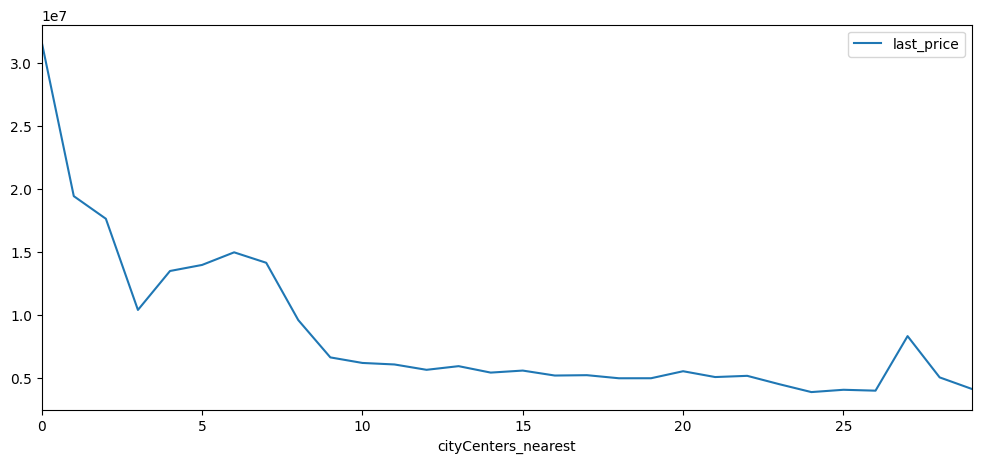

In [42]:
saint_petersburg.pivot_table(index='cityCenters_nearest', values='last_price').plot(xlim=(0, 29), figsize=(12, 5))

На графике видно влияние удалённости от центра на стоимость квартиры. Цена резко падает после 7-го км. На 27-м км наблюдается рост. Это можно связать с возможным строительством нового ЖК. После 3-го км начинается небольшой рост, можно связать его с близостью к метро. Таким образом, центром можно считать область, радиус которой равен 3-ми км.

###  Выделим сегмент квартир, находящихся в центре. Изучим площадь, цену, число комнат, высоту потолков в этом срезе. Определеним, какие факторы влияют на стоимость квартиры (площадь, число комнат, этаж, удалённость от центра, дата размещения объявления).

Выберем квартивы, находящиеся в центре Питера

In [43]:
center_spb = saint_petersburg[saint_petersburg['cityCenters_nearest'] <= 3].copy()

**Изучим площадь, цену, число комнат и высоту потолков**

count    658.000000
mean      95.865897
std       54.134076
min       12.000000
25%       62.000000
50%       83.000000
75%      113.075000
max      483.900000
Name: total_area, dtype: float64

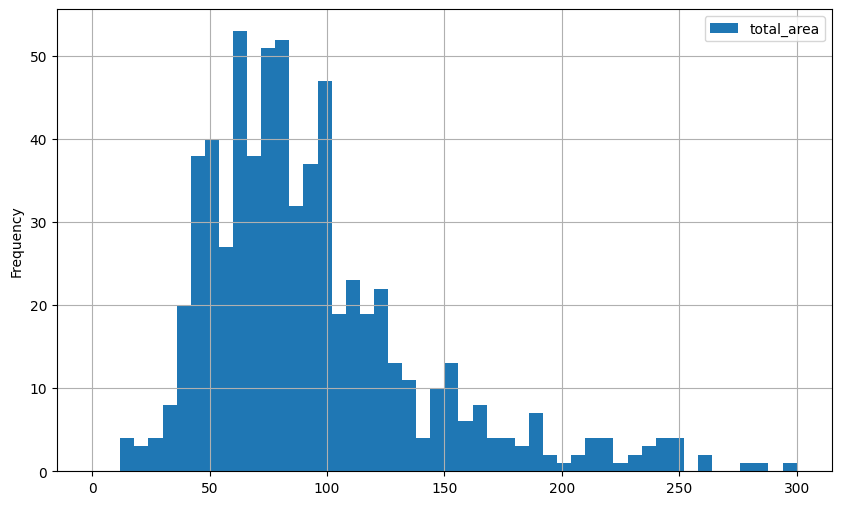

In [44]:
center_spb.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(10,6), range=(0, 300))
center_spb['total_area'].describe()

Заметим, что процент продаваемых квартир с площадью более 100 кв.м. в центре больше, чем процент таких же квартир от общего числа объявлений. Наиболее попрулярные квартиры с площадью от 55 до 100 кв.м.

count    6.580000e+02
mean     1.563911e+07
std      2.703492e+07
min      2.100000e+06
25%      6.900000e+06
50%      9.200000e+06
75%      1.399750e+07
max      4.013000e+08
Name: last_price, dtype: float64

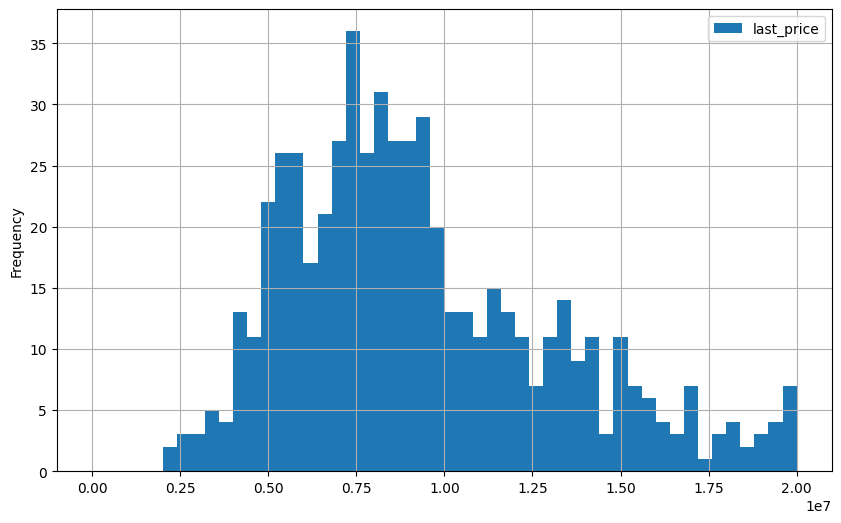

In [45]:
center_spb.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(10,6), range=(0, 20000000))
center_spb['last_price'].describe()

Квартиры дешевле 2 млн. рублей в центре даже не публиковались. Больше всего объявлений с квартирами стоимостью 5-10 млн. рублей. В центре квартиры стоимостью более 10 млн. рублей тоже не редкость. При изучении стоимости всех квартир, чаще всего встречались квартиры стоимостью 2.5-6 млн. рублей, а квартиры дороже 10 млн. составляли совсем небольшой процент от общего числа.

count    658.000000
mean       3.069909
std        1.451805
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

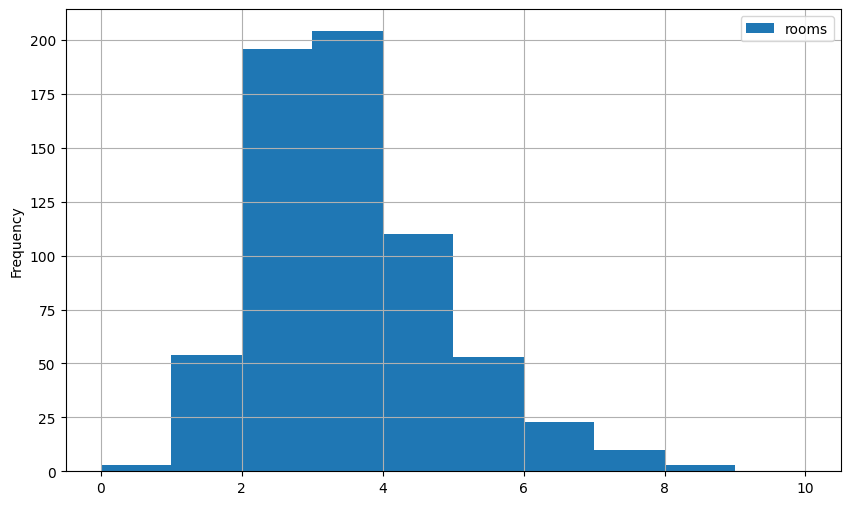

In [46]:
center_spb.plot(y='rooms', kind='hist', bins=10, grid=True, figsize=(10,6), range=(0, 10))
center_spb['rooms'].describe()

Рассмотрев количество комнат в квартирах, продаваемых в центре города, можно обратить внимание, что в основном тут продаются двух- и трёхкомнатные квартиры. Среди всех квартир чаще всего встречались однокомнатные и двухкомнатные.

count    450.000000
mean       3.264822
std        1.179127
min        2.500000
25%        3.000000
50%        3.200000
75%        3.447500
max       27.000000
Name: ceiling_height, dtype: float64

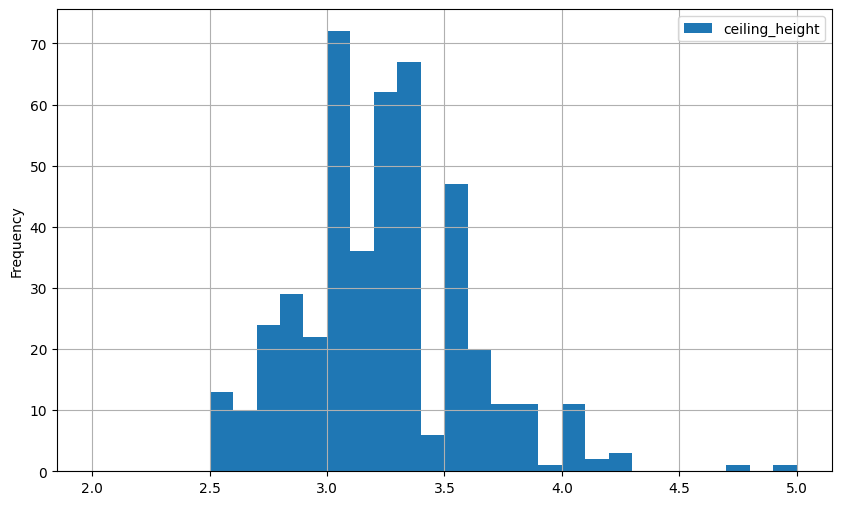

In [47]:
center_spb.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(10,6), range=(2, 5))
center_spb['ceiling_height'].describe()

В центре Питера чаще продают квартиры с высотой потолков 3-3.3 м. В общей выборке таких квартир было достаточно мало в процентом соотношении. Там преобладали квартиры с высотой потолков 2.5-2.8 м.

**Определим, как разные факторы влияют на стоимость квартиры**

In [48]:
center_spb[['last_price', 'total_area', 'rooms', 'floor', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,floor,cityCenters_nearest
last_price,1.000000,0.599505,0.262220,0.260857,-0.164723
total_area,0.599505,1.000000,0.744867,0.218922,-0.129666
rooms,0.262220,0.744867,1.000000,0.118644,-0.076035
floor,0.260857,0.218922,0.118644,1.000000,-0.009127
cityCenters_nearest,-0.164723,-0.129666,-0.076035,-0.009127,1.000000


Матрица корреляции квартир в центре Питера и матрица корреляции всех квартир совсем незначительно отличается. Влияние площади, количества комнат и удалённости от центра города на цену немного уменьшилось. Но в целом суть осталась та же. Цена квартиры зависит от количества комнат в квартире так же, как и этаж квартиры. 

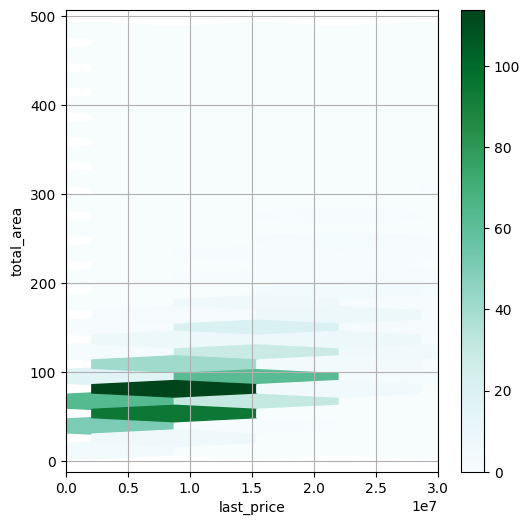

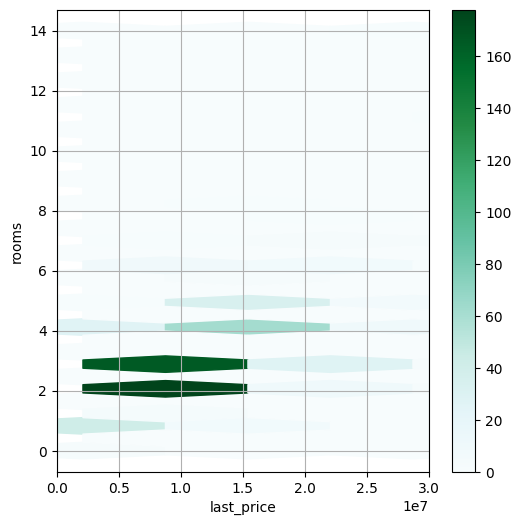

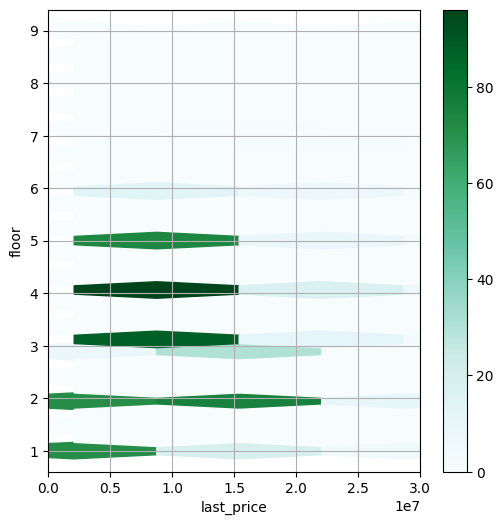

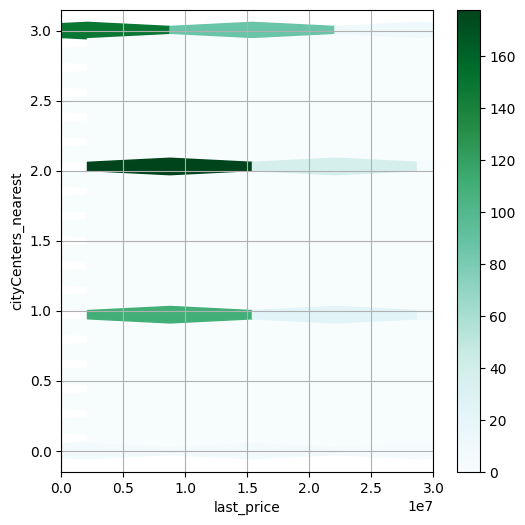

In [49]:
for type in ['total_area', 'rooms', 'floor', 'cityCenters_nearest']:
    center_spb.plot(x='last_price', y=type, kind='hexbin', gridsize=30, figsize=(6,6), sharex=False, grid=True, xlim=(0, 30000000))

Графики площади и количества комнат квартиры совпадает с тем, что описывалось немного выше. По графику этажа видно, что квартиры, находящиеся выше 5-го этажа практически отсутствуют, что логично, поскольку мы исследуем Питер. Чаще всего продавались квартиры на 4-м этаже. На графике удалённости от центра города видно, что чаще выставляются на продажу квартиры, удалённые от центра города на 2 км.

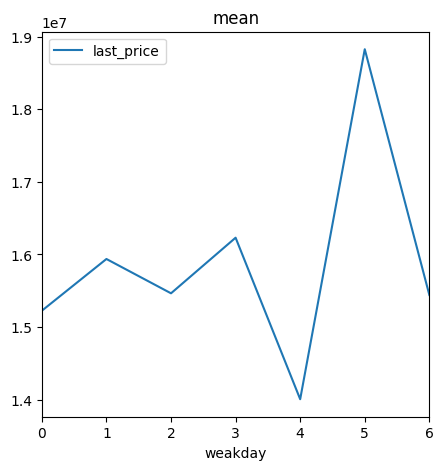

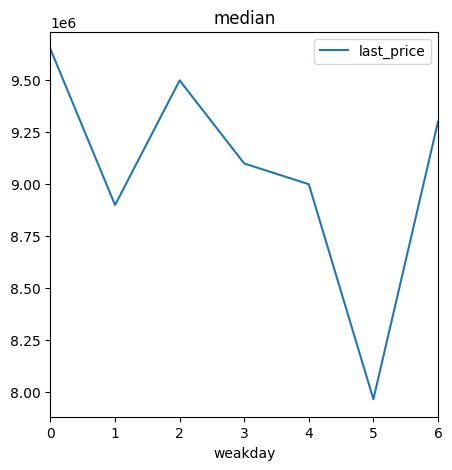

In [50]:
for type in ['mean', 'median']:
    center_spb.pivot_table(index='weakday', values='last_price', aggfunc=type).plot(xlim=(0,6), title=type, figsize=(5, 5))

График средней цены по дням недели квартир в центре Питера похож на график средней цены по дням недели всех квартиры. Графики медианных значений отличаются. Можно заметить, что в субботу повлялись слишком дорогие предложения, но большинство субботних предложений были дешевле обычного.

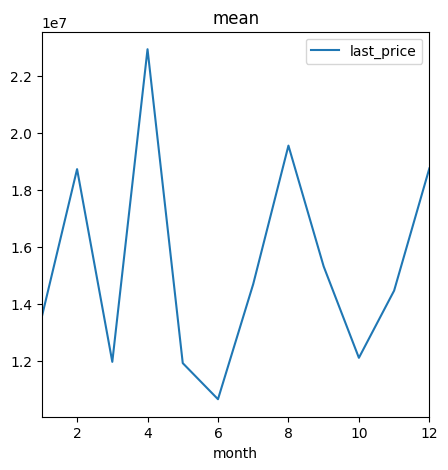

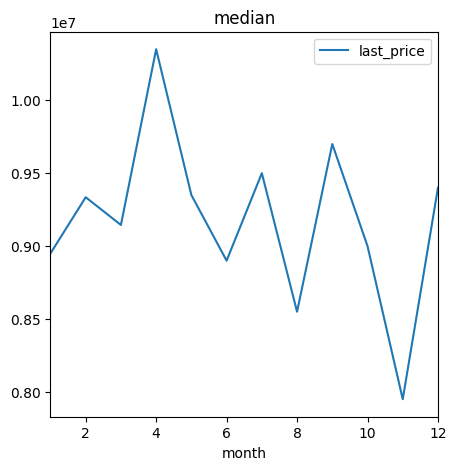

In [51]:
for type in ['mean', 'median']:
    center_spb.pivot_table(index='month', values='last_price', aggfunc=type).plot(xlim=(1,12), title=type, figsize=(5, 5))

На графиках можно заметить, чо в феврале, апреле, июле, сентябре и декабре чаще выставляются дорогие квартиры, а остальные месяцы преобладают дешёвые.

,last_price,year
last_price,1.000000,-0.045098
year,-0.045098,1.000000


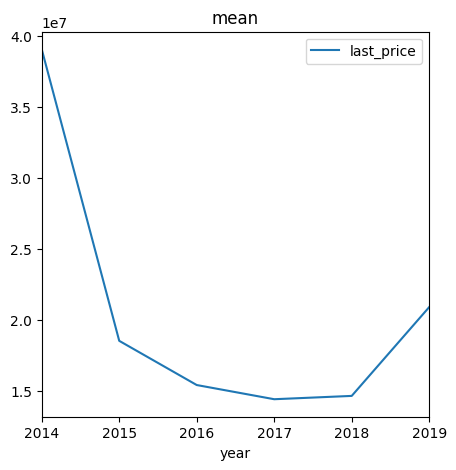

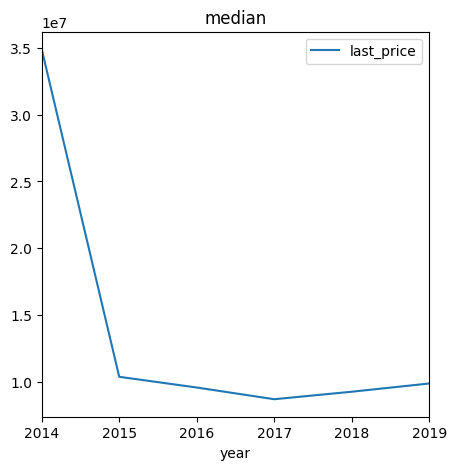

In [52]:
for type in ['mean', 'median']:
    center_spb.pivot_table(index='year', values='last_price', aggfunc=type).plot(xlim=(2014,2019), title=type, figsize=(5, 5))
center_spb[['last_price', 'year']].corr()

А вот зависимость цены от года публикации объявления осталась прежней, минимальной. Графики тоже сильно не отличаются. Можно добавить, что в 2015 квартиры сильно подешевели, а рост цены начался не в 2019, а уже в 2018.

## Общий вывод

После обработки даныых были выявлены следующие показатели:
- Оказалось, что нормальный период, в течении которого продаётся квартира, составляет 8 с половиной месяцев.
- На цену квартиры больше всего влияет её площадь.
- Менее значенительно влияют количетсво комнат, этаж и удалённость от центра.
- После 2017-ого цена квартир начала увеличиваться, до этого она уменьшалась.
- Чаще продаются квартиры с 1-3 комнатами.
- Зависимость от дня недели публикации и от месяца совсем незначительна.